# Predicting Sunspots with Neural Networks

This notebook will train on the [Sunspots](https://www.kaggle.com/datasets/robervalt/sunspots) dataset: a monthly record of sunspot numbers from January 1749 to July 2018. The plan is to build a deep neural network here composed of dense layers. This will act as your baseline so you can compare it to the other 2 models, i.e. RNN and LSTM, where entail a more complex architecture.

Let's begin!

## Imports

You will use the same imports as before with the addition of the [csv](https://docs.python.org/3/library/csv.html) module. You will need this to parse the CSV file containing the dataset.

In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## Utilities

Have the `plot_series()` custom plot function ready here so to simplify plot procedures. 

In [57]:
def plot_series(x, y, start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None, linestyle='-', color=None):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      linestyle (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 4), dpi=360)
    
    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], linestyle=linestyle, color=color)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], linestyle=linestyle, color=color)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## Download and Preview the Dataset

You can now download the dataset and inspect the contents. The link in class is from Laurence's repo but we also hosted it in the link below.

In [3]:
'''
Download dataset from Kaggle
(These commands work in MacOS terminal too. Just drop the '!' and run them in the terminal.)
'''

# # 1. Install Kaggle API if you don't have it. (Uncomment the line below.)
# %pip install kaggle

# # 2. Put Kaggle token to the required directory [~/.kaggle/kaggle.json]
# !mkdir ~/.kaggle && mv ~/Downloads/kaggle.json ~/.kaggle/

# # 3. Check setup is successful. 
# !ls ~/.kaggle

# # 4. Show the desired dataset. 
# !kaggle datasets list -s 'name_of_your_dataset'
# dataset name: robervalt/sunspots

# # 5. Download dataset. 
# !kaggle datasets download -d 'username/name_of_the_dataset' 

# # 6. Unzip the zip file.
# !unzip name_of_the_dataset.zip

# # 7. Inspect the dataset. 
# ! head name_of_the_dataset.csv


"\nDownload dataset from Kaggle\n(These commands work in MacOS terminal too. Just run them without the '!'.)\n"

Running the cell below, you'll see that there are only three columns in the dataset:
1. untitled column containing the month number
2. Date which has the format `YYYY-MM-DD`
3. Mean Total Sunspot Number

## Time series analysis using statistical tools and techniques

### Visualise the dataset

For this lab and the next, you will only need the month number and the mean total sunspot number. You will load those into memory and convert it to arrays that represents a time series.

In [55]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./Sunspots.csv') as csvfile:
  
  # Initialize reader
  reader = csv.reader(csvfile, delimiter=',')
  
  # Skip the first line
  next(reader)
  
  # Append row and sunspot number to lists
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))


In [56]:
# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

In [16]:
# Test if series contains any 0. False - yes, it does. True - no, it does not. 
np.all(series)

False

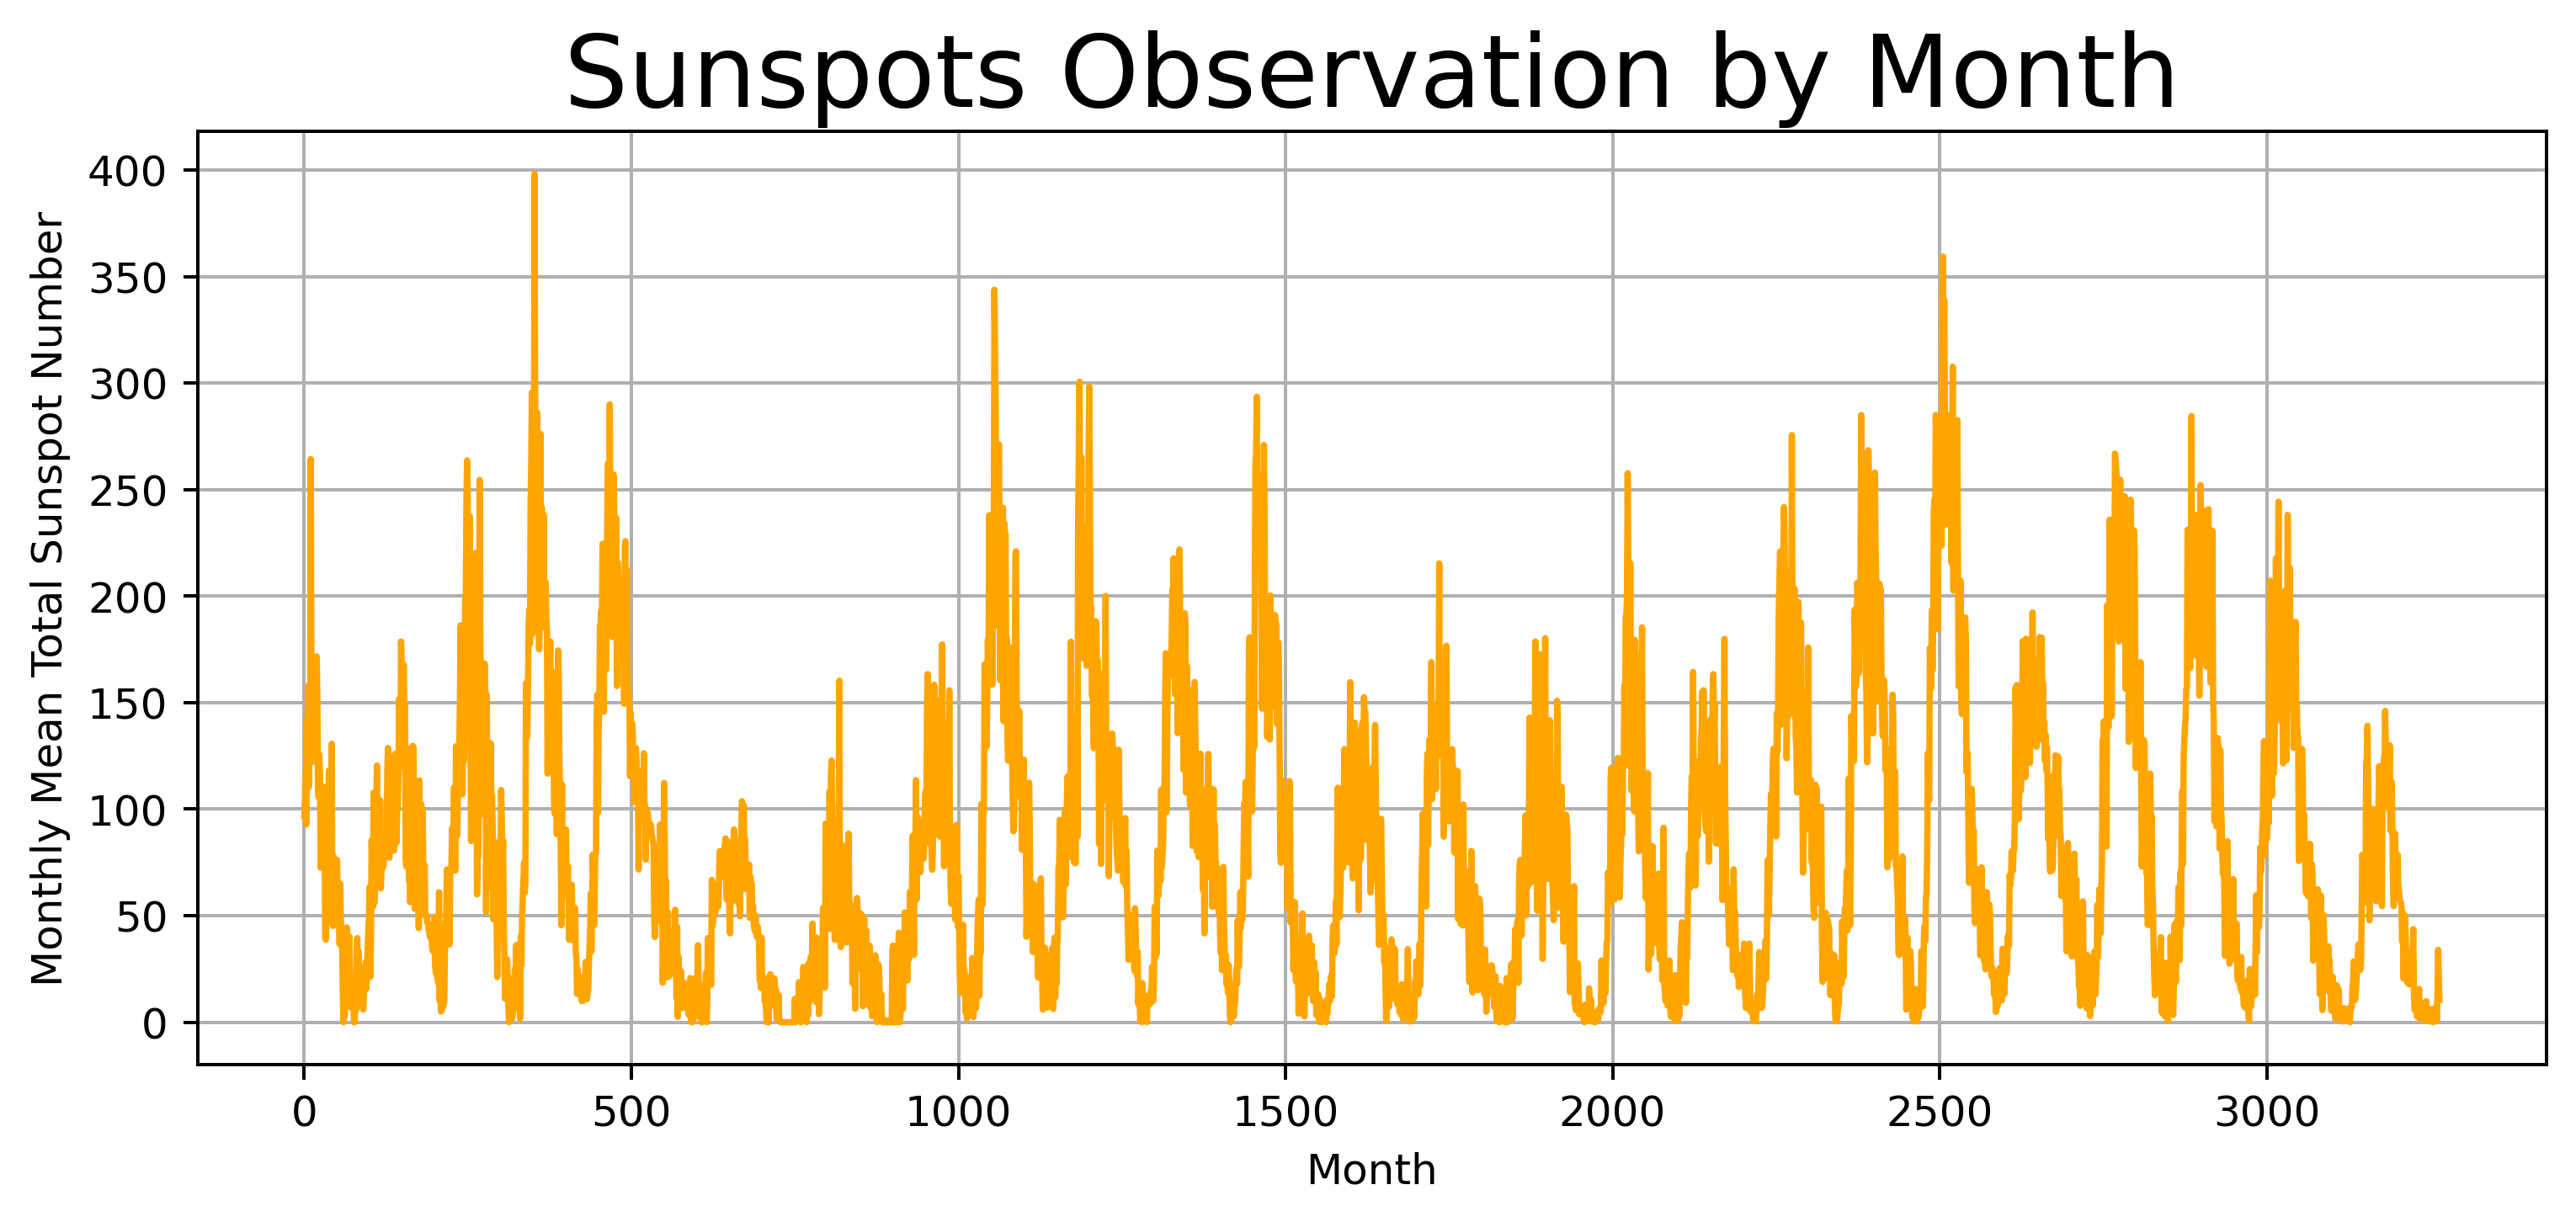

In [58]:

# Preview the data
plot_series(time, series, title='Sunspots Observation by Month', xlabel='Month', ylabel='Monthly Mean Total Sunspot Number', color='orange')

Through inital observation, a good guess could be that the time series entails nonconstant variance and seasonal component. Another important thing to consider is that it also illustrates cyclic behaviour. 

To give some background of types of time series:

Time series has common patterns such as seasonality, trend and cyclical. 

For other types of time series, it can also be irregular, extreme fluctuation that can be caused by sudden events. It's called non-stationary time series. 

Some are not predictable at all, just completely random. It's typically white noise.

Another type can have no trend or seasonality. Spikes appear at random time steps, but after each spkie they have very deterministic rate of decay. They are auto-correlated time seires. 

### Two side view - To emphasize the trend

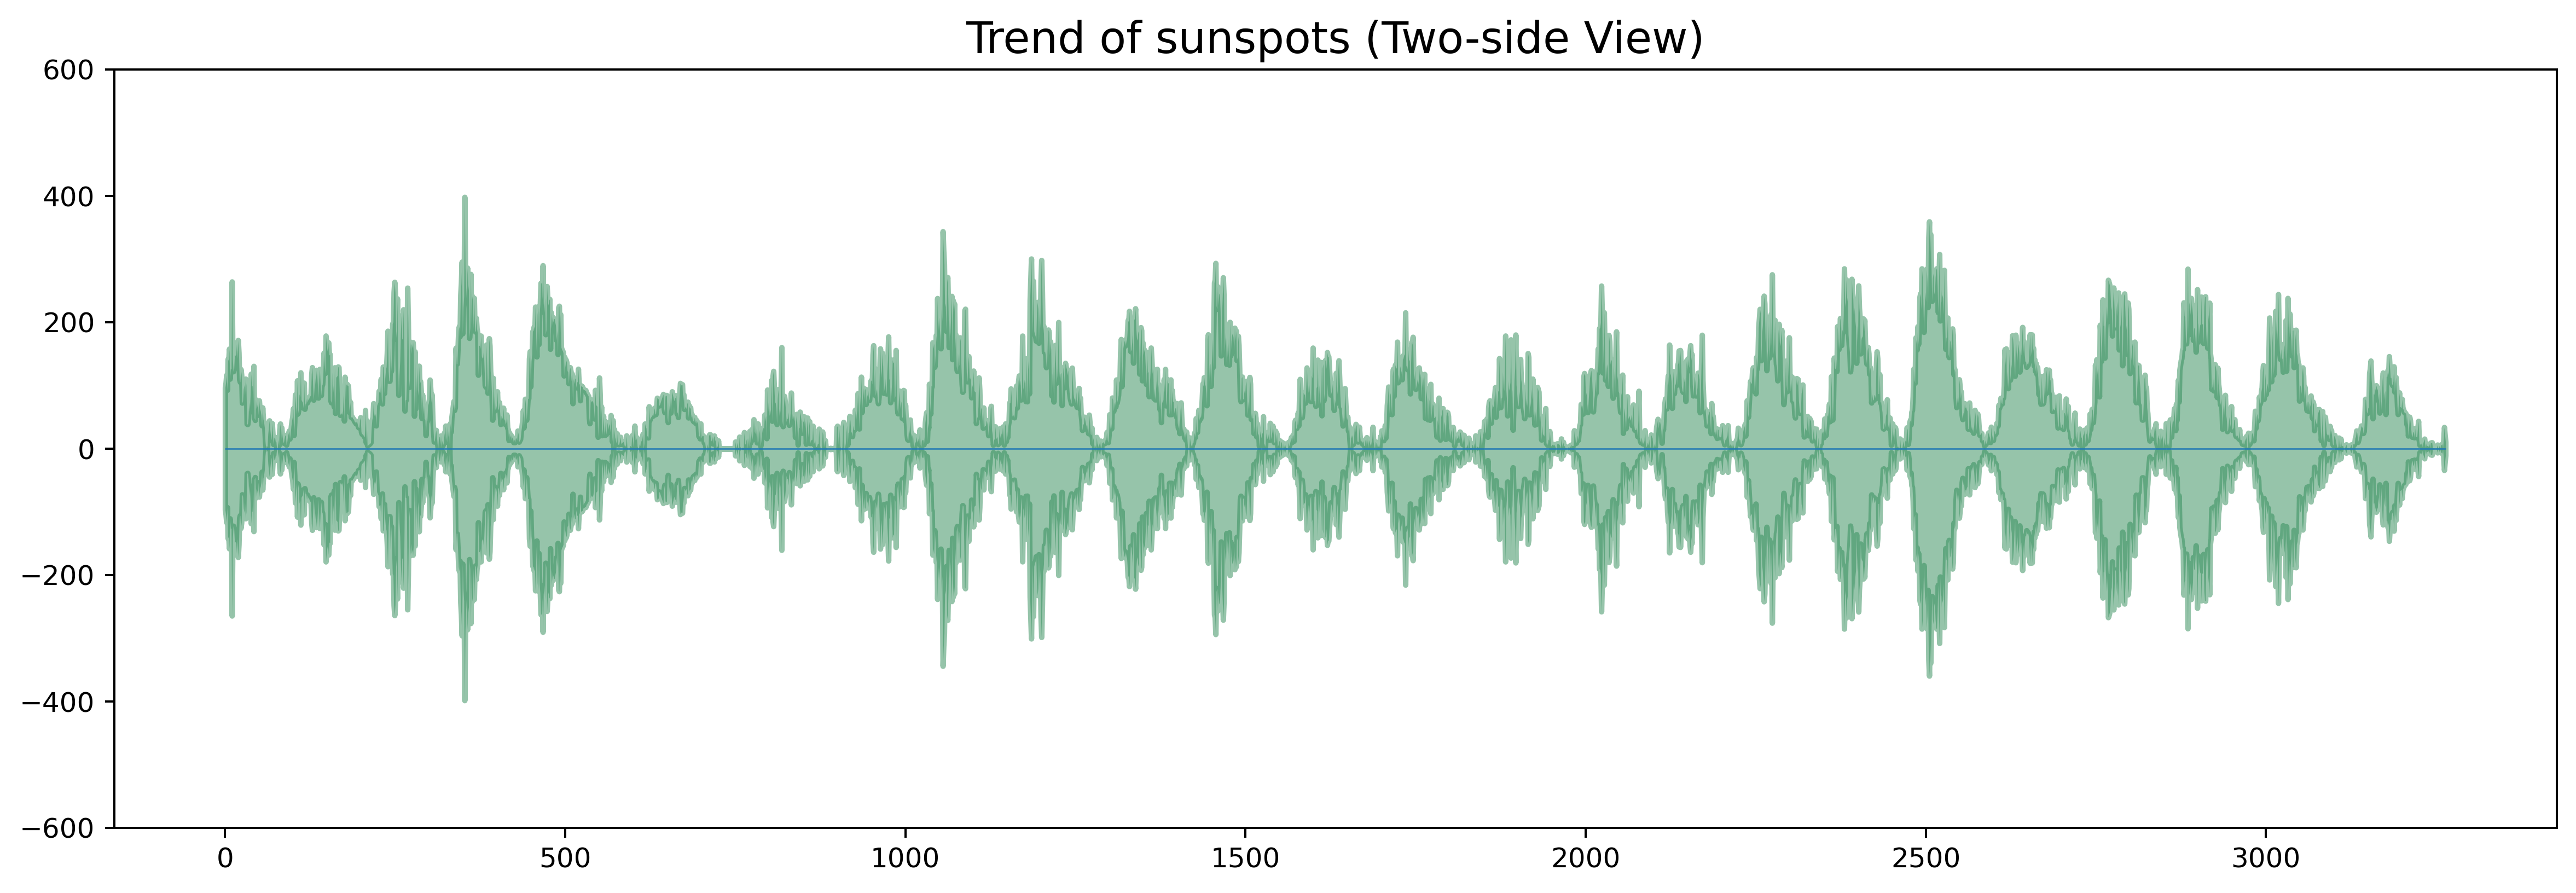

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=360)
ax.fill_between(time, y1=series, y2=-series, alpha=0.5, linewidth=2, color='seagreen')
ax.axis(ymin=-600, ymax=600)
ax.set_title('Trend of sunspots (Two-side View)', fontsize=16)
ax.hlines(y=0, xmin=np.min(time), xmax=np.max(time), linewidth=.5)

It can be seen that its a monthly time series and follows a certain repetitive pattern every couple years. 

Meanwhile, there is no clear growing or decreasing trend in the chart. 

### Decomposition of the Time Series

Additive or Multiplicative combination of the base level, trend, seasonal index and the residual term. 

**Additive time series:**

Value = Base Level + Trend + Seasonality + Error

**Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

We  will apply the seasonal_decompose module in the package statsmodels to find out the values of these attributes. 

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd 
from dateutil.parser import parse

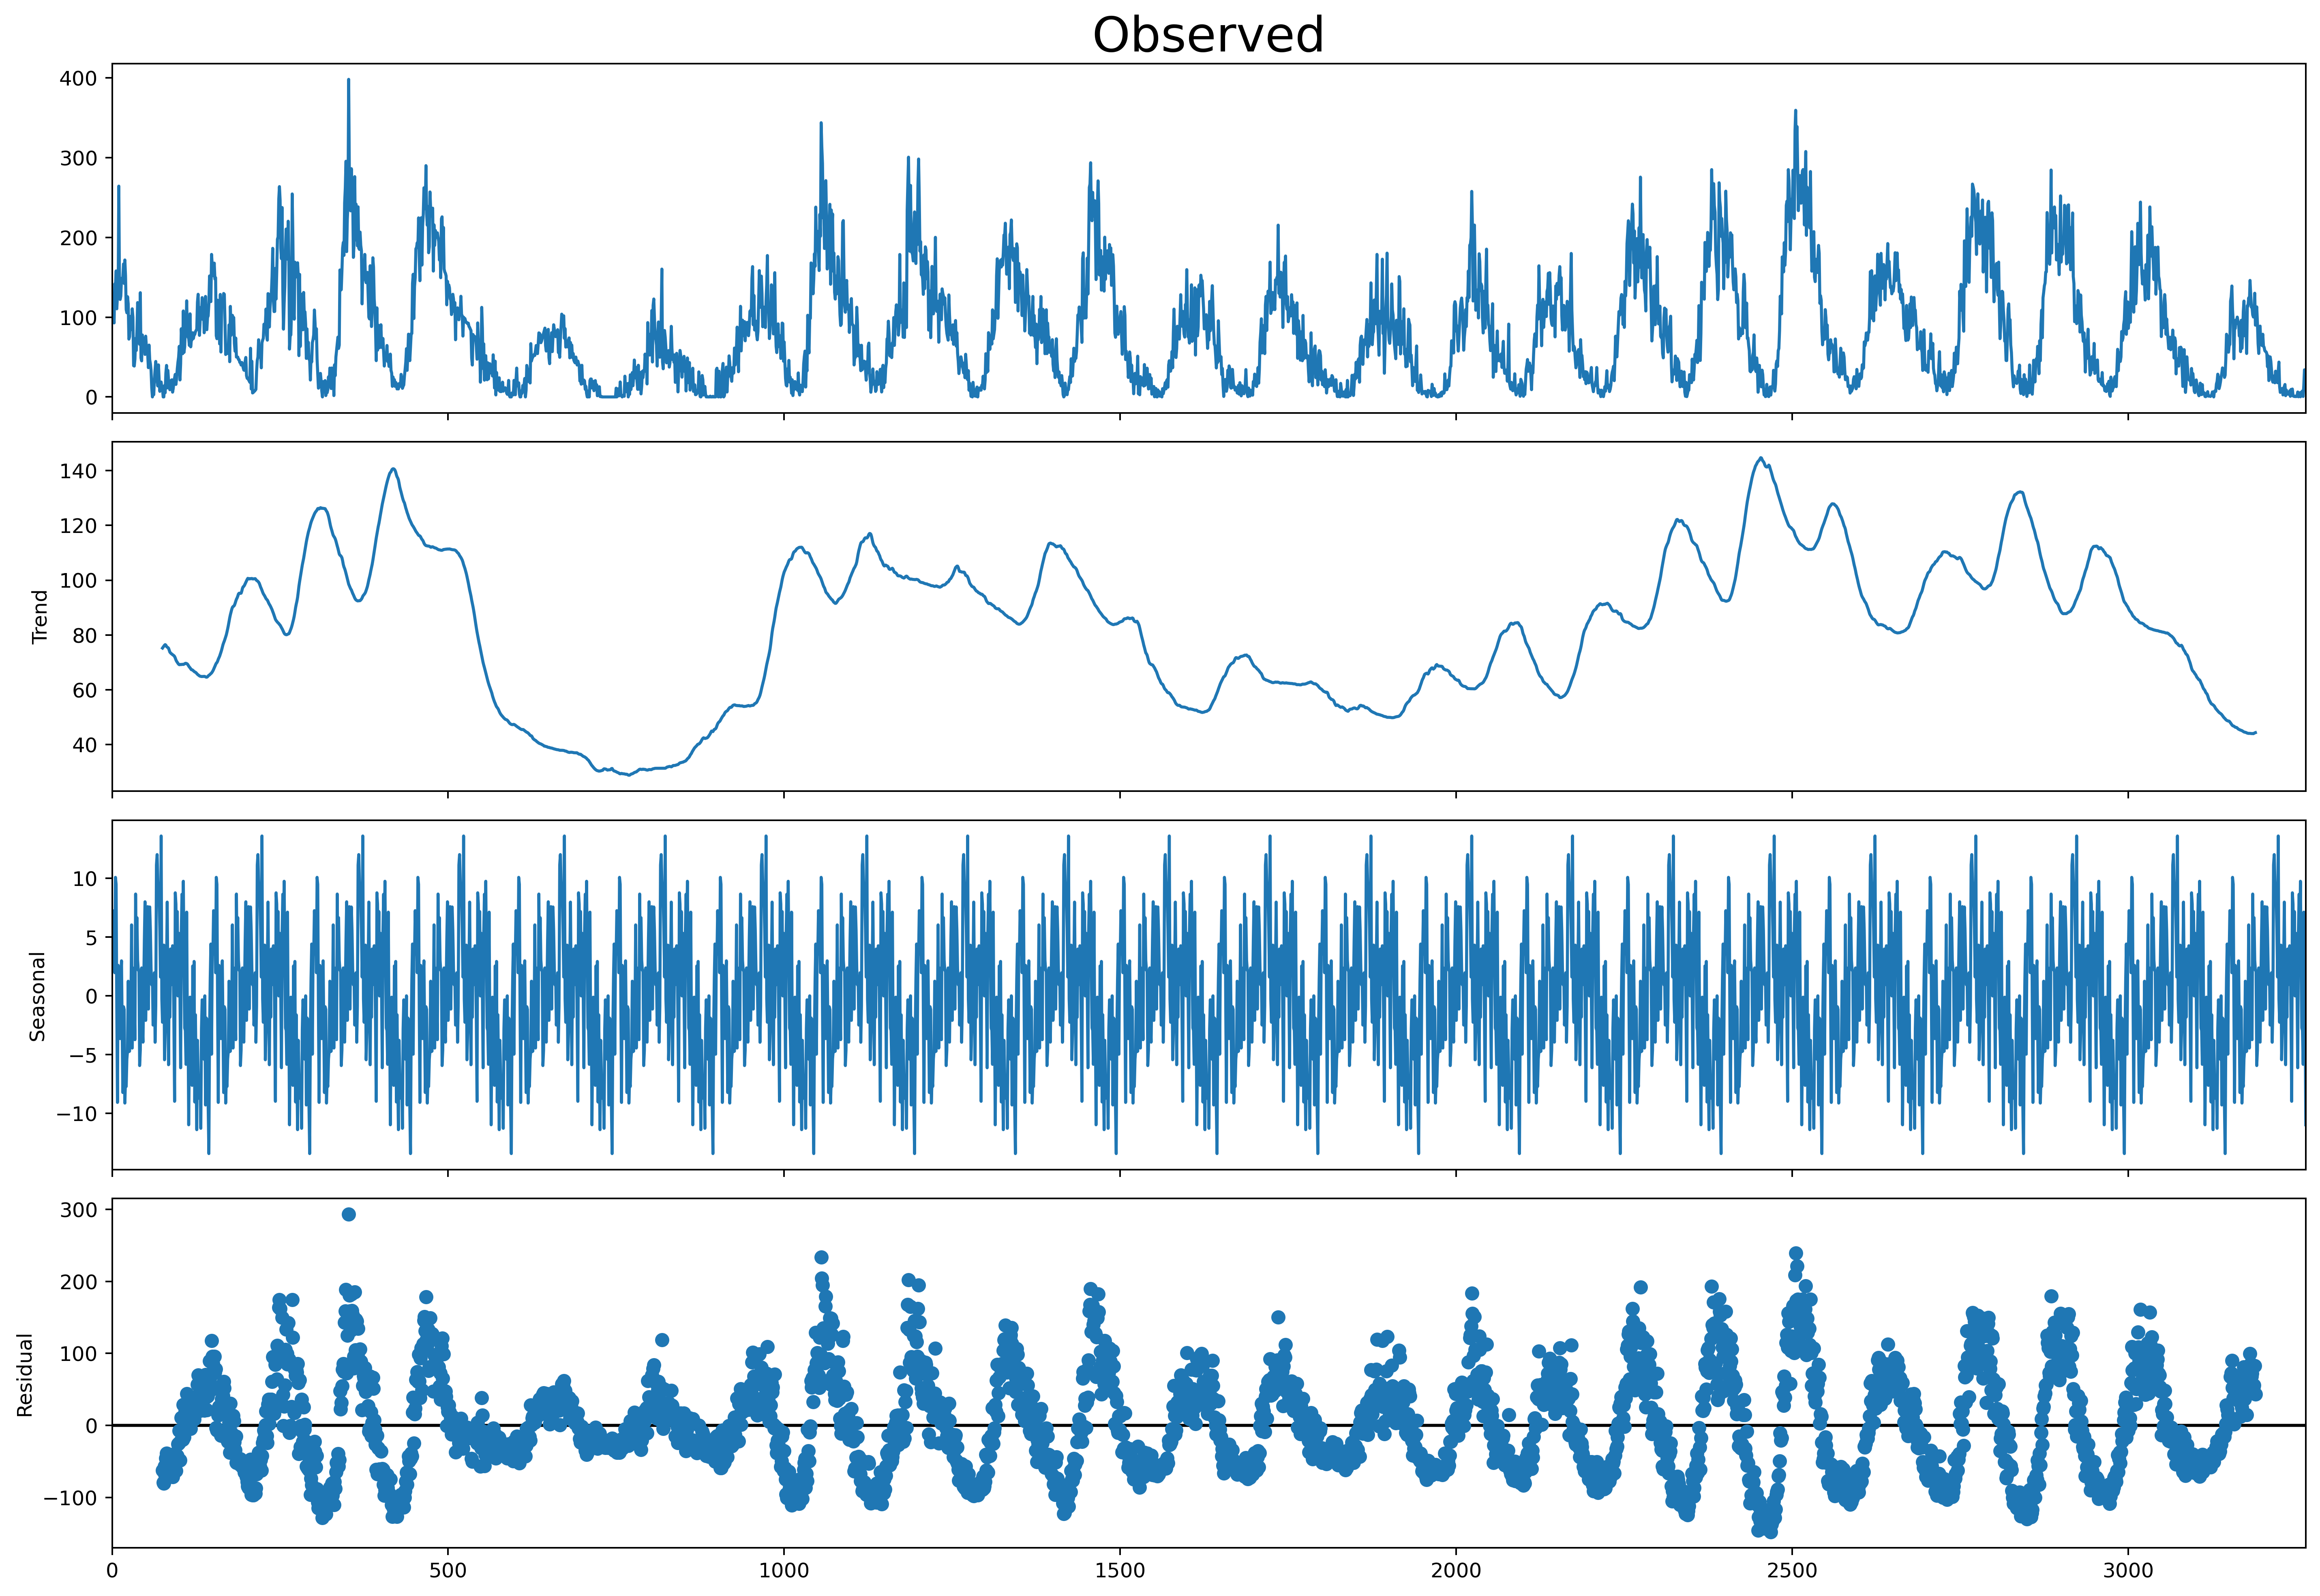

In [60]:
# Multiplicative Decomposition
# multi_decomp = sd(series, model='multiplicative', period=30)

# Additive Decomposition
add_decomp = sd(series,model='additive', period=150)

# Plot
plt.rcParams.update({'figure.figsize': (16,12), 'figure.dpi': 360, 'axes.titlesize': 24})
add_decomp.plot()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# fig_decomp = add_decomp.plot()
# plt.show()

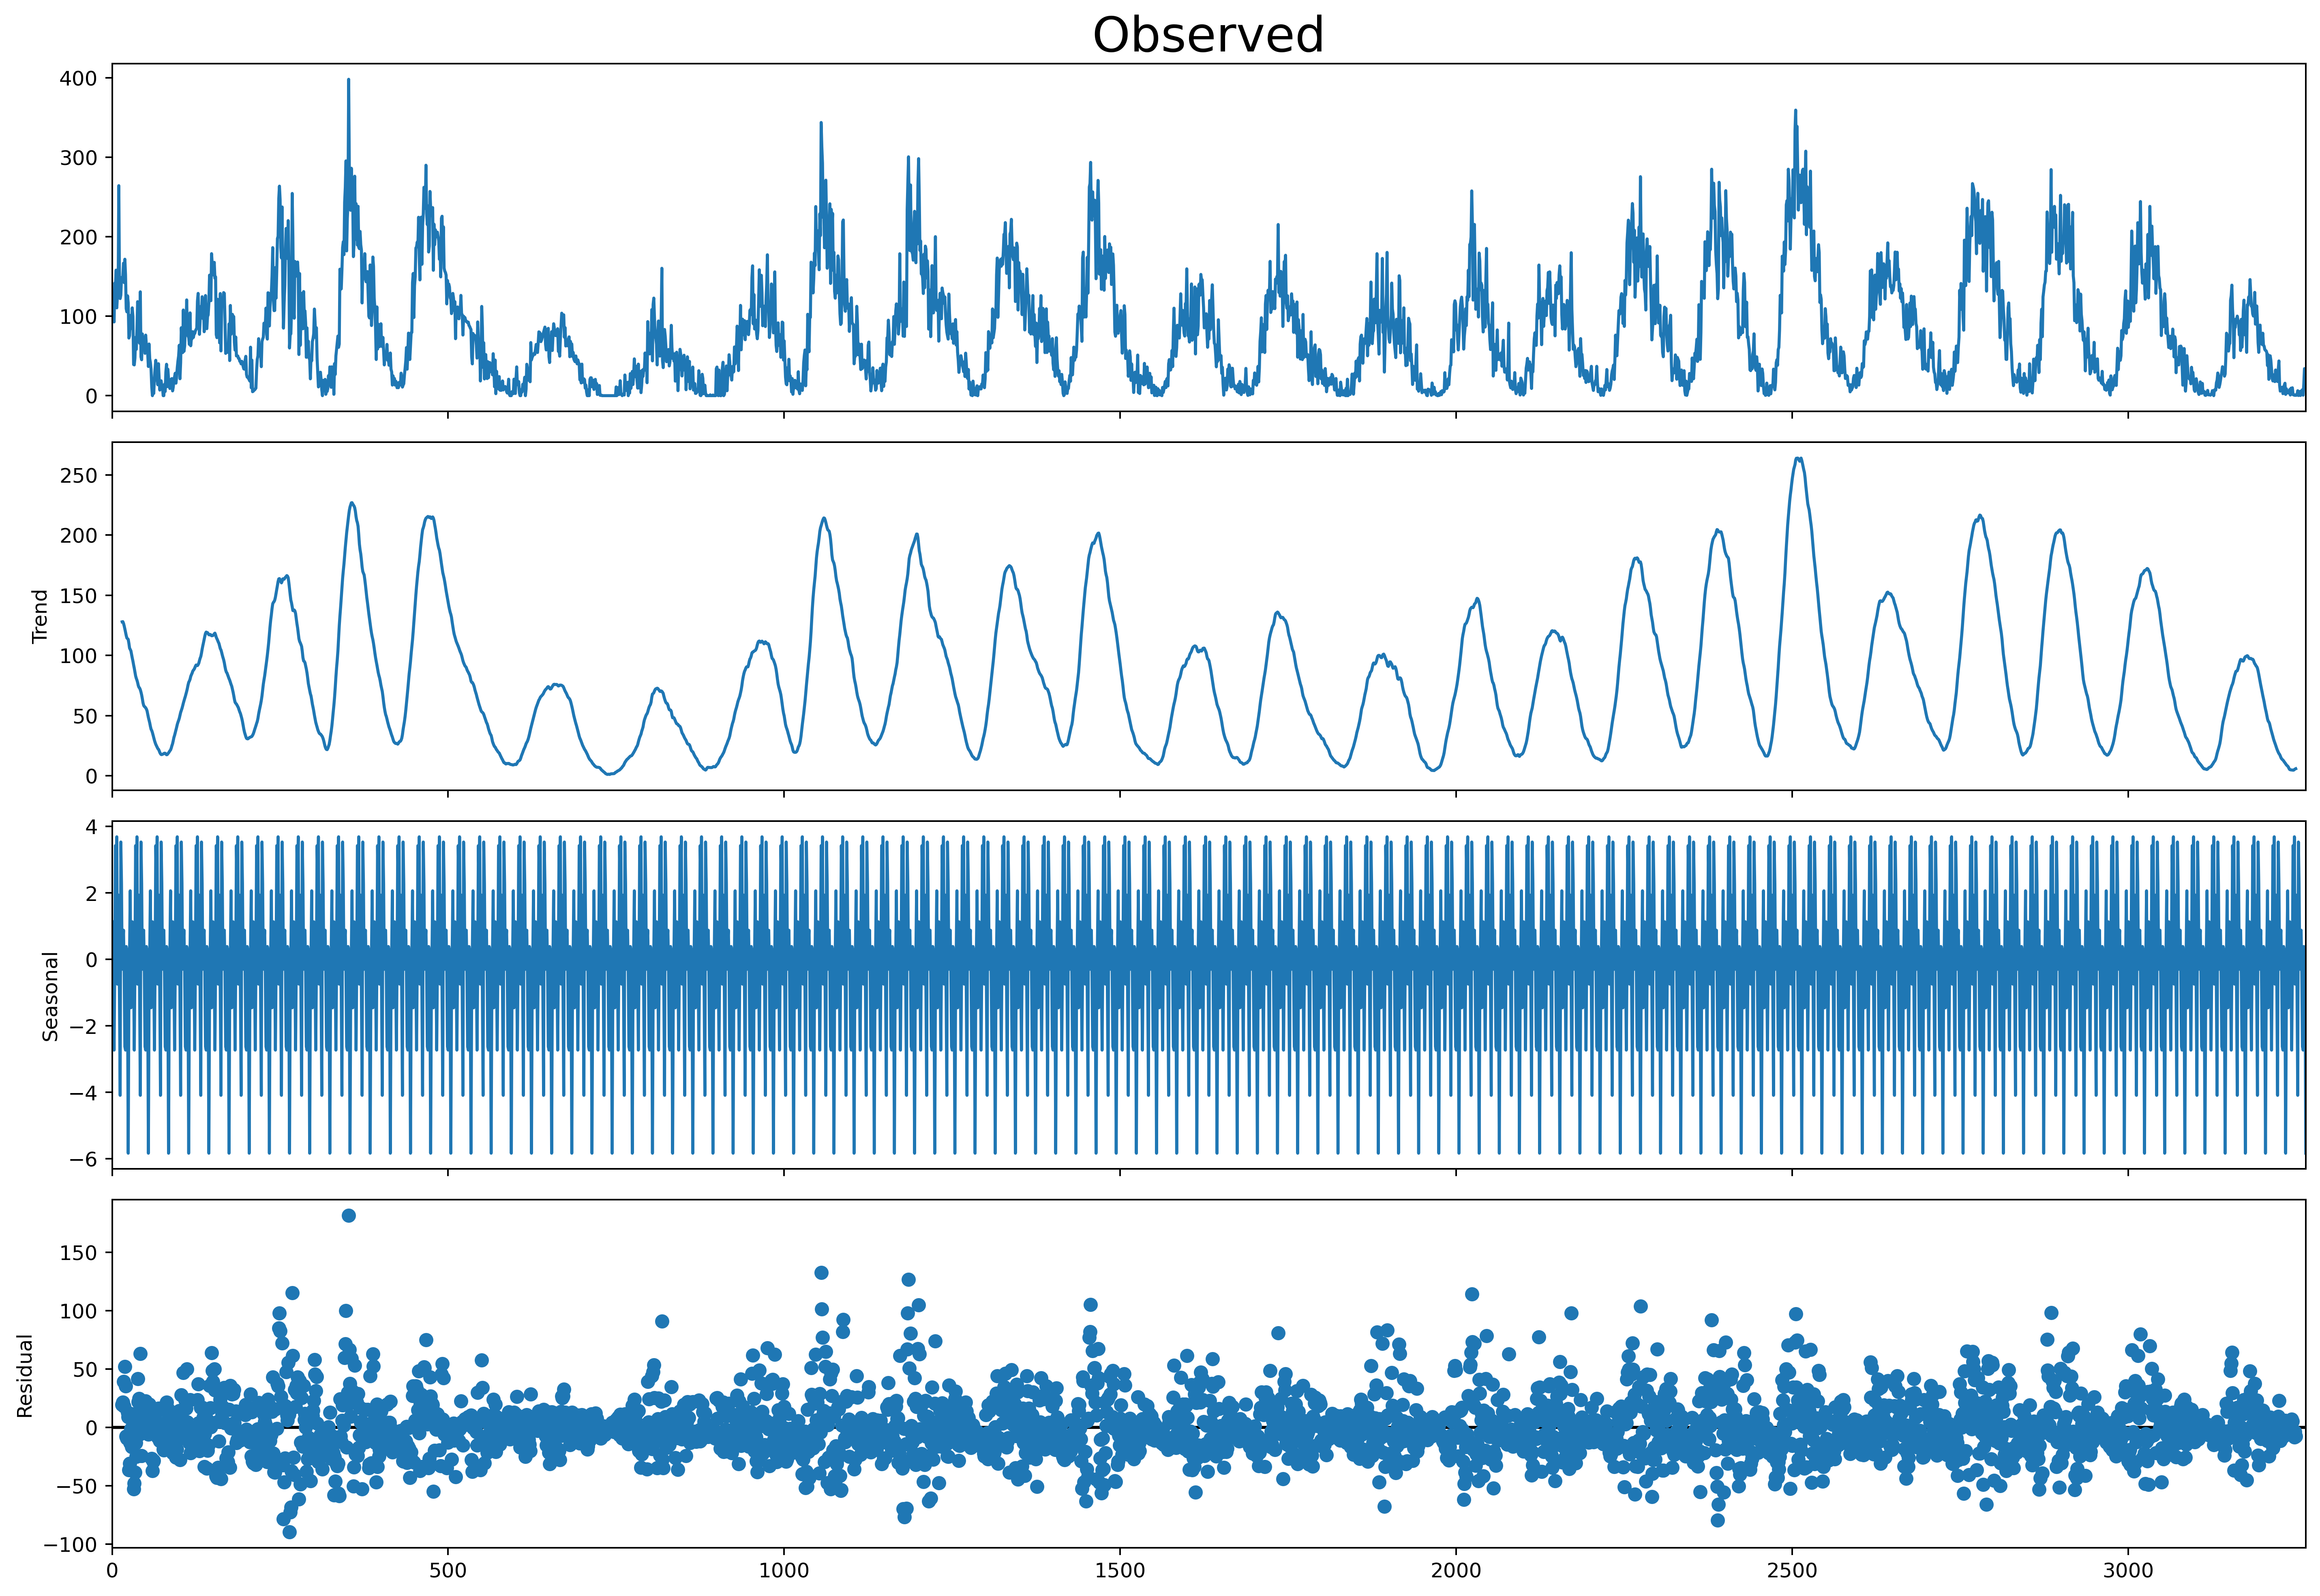

In [62]:
# Additive Decomposition
add_decomp = sd(series,model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12), 'figure.dpi': 360, 'axes.titlesize': 24})
add_decomp.plot()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Stationary, Non-stationary Time Series and Conversion

#### Test for stationarity

### Deseasonalise a Time Series

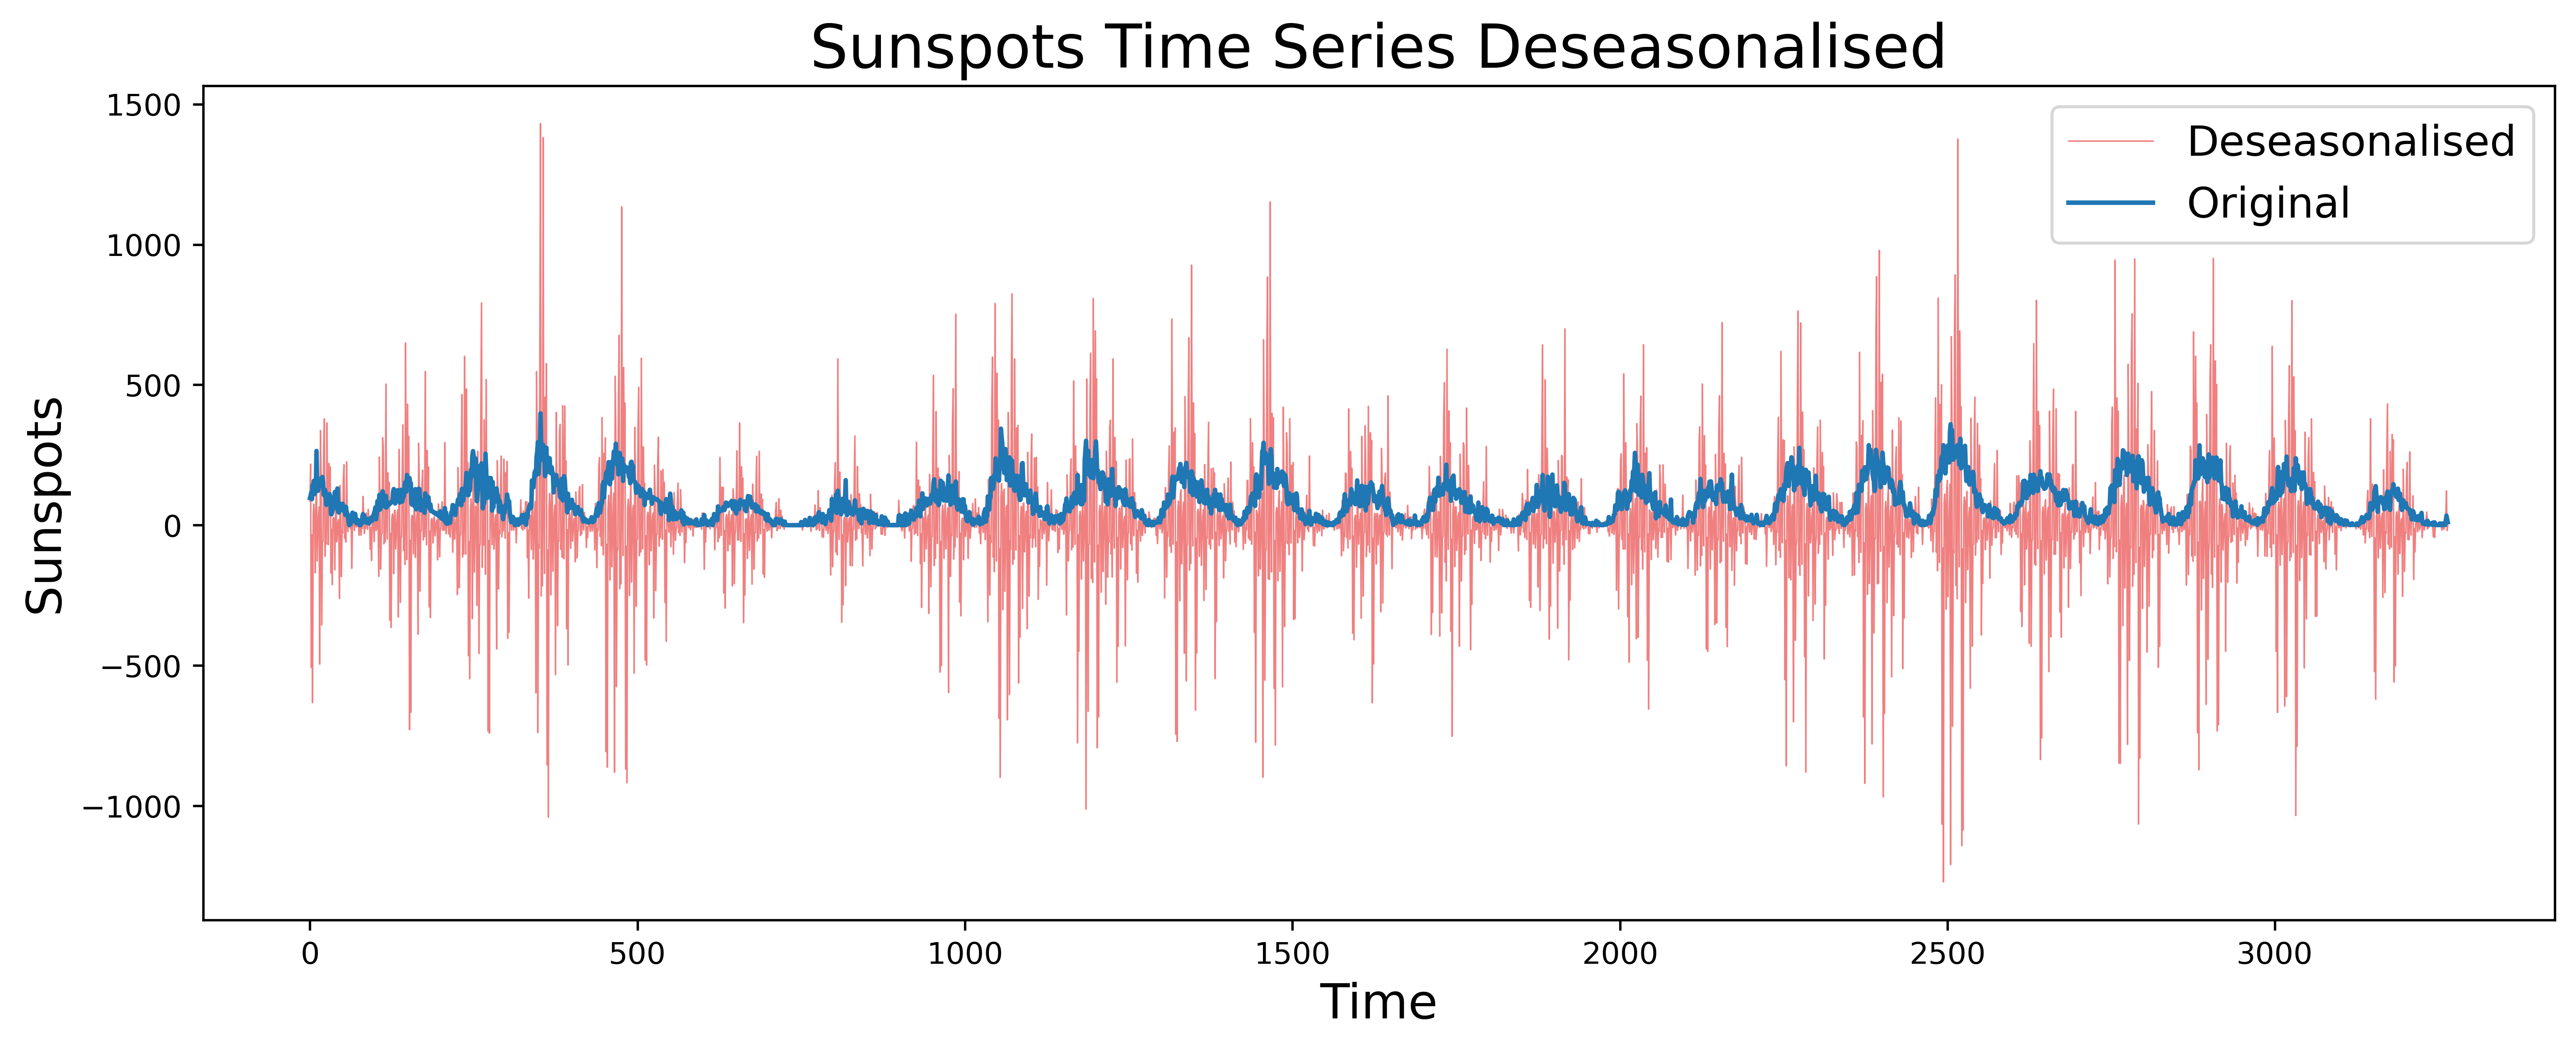

In [116]:
# Time Series Decomposition
deseason = series / add_decomp.seasonal

# Plot
fig_sea, ax_sea = plt.subplots(1, 1, dpi=480, figsize=(14, 5))

ax_sea.set_title('Sunspots Time Series Deseasonalised', fontsize=20)
ax_sea.plot(deseason, color='lightcoral', label='Deseasonalised', linewidth=0.5)
ax_sea.plot(series, label='Original')
ax_sea.set_xlabel('Time', fontsize=16)
ax_sea.set_ylabel('Sunspots', fontsize=16)
ax_sea.legend(fontsize=14)


#### Test for Seasonality

## Data Preprocessing

### Split the Dataset

Next, you will split the dataset into training and validation sets. There are 3235 points in the dataset and you will use the first 3000 for training.

In [6]:
# Define the split time
split_time = 3000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

### Prepare Features and Labels

You can then prepare the dataset windows as before. The window size is set to 30 points (equal to 2.5 years) but feel free to change later on if you want to experiment.

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size)
    
    # Optimize the dataset for training
    dataset = dataset.cache().prefetch(1)
    
    return dataset

In [8]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## Build the Model

The model will be 3-layer dense network as shown below.

In [9]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,)),
    tf.keras.layers.Dense(30, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

## Tune the Learning Rate

You can pick a learning rate by running the same learning rate scheduler code from previous labs.

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

(1e-08, 0.001, 0.0, 100.0)

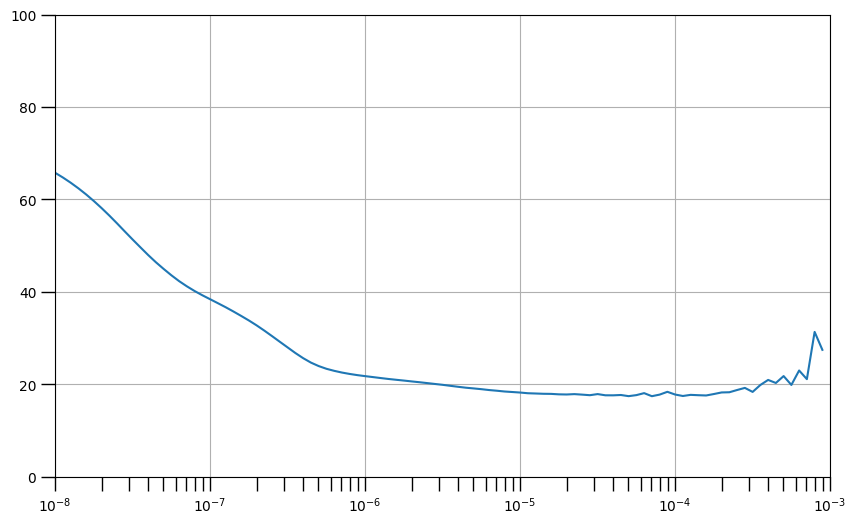

In [11]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

## Train the Model

Once you've picked a learning rate, you can rebuild the model and start training.

In [12]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(window_size,)),
    tf.keras.layers.Dense(30, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Set the learning rate
learning_rate = 2e-5

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set,epochs=100)

## Model Prediction

Now see if the model generates good results. If you used the default parameters of this notebook, you should see the predictions follow the shape of the ground truth with an MAE of around 15. 

In [14]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset, verbose=0)
    
    return forecast

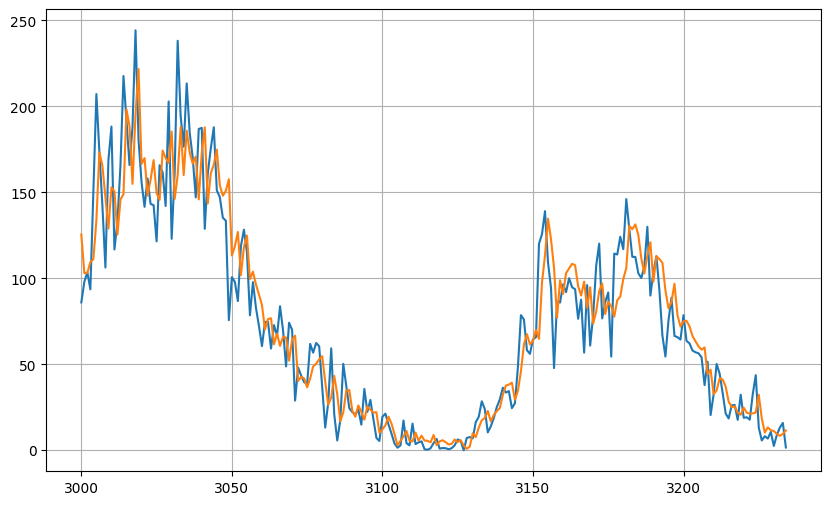

In [15]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [16]:
# Compute the MAE
print(tf.keras.metrics.mae(x_valid, results).numpy())

15.110337


## Wrap Up

In this lab, you built a relatively simple DNN to forecast sunspot numbers for a given month. We encourage you to tweak the parameters or train longer and see the best results you can get. In the next lab, you will build a more complex model and you evaluate if the added complexity translates to better or worse results.